<a href="https://colab.research.google.com/github/FourLevel/Machine-Learning-and-Financial-Applications/blob/main/Midterm%20Exam/Midterm%20Exam_%E7%8E%8B%E5%A3%AB%E8%AA%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam
## Name: M11218014 王士誠 Finance

---

There are 3 questions in the midterm exam:

1. Besides accuracy, what other criteria should a good regression model meet? How can we measure these criteria? (40 points)

2. What are the limitations of the SARIMAX model, based on your response to Question 1? What have other researchers said about these limitations? (20 points)

3. Using the dataset from Homework 1, tune an MLP model that can compete with your final SARIMAX model from Homework 1. Provide a comparison between both models that is as objective and fair as possible. (40 points)

Note: Please limit your response to one page for each question. An itemized list, along with figures and tables, is encouraged in your writing style.

---

### Question 1.

Besides accuracy, what other criteria should a good regression model meet? How can we measure these criteria?

### Answer 1.

良好的迴歸模型除準確度外，還應衡量以下評估標準：
1. 模型複雜度與泛化能力
	- 衡量工具：
    	1. AIC:
      	\begin{equation}
      	AIC = -2 \space \ln L + 2 \space k
      	\end{equation}
	  	平衡擬合優度與參數數量，懲罰過度參數化

    	2. BIC:
	  	\begin{equation}
      	BIC = -2 \space \ln L + k \space \ln n
      	\end{equation}
	  	n 為樣本量，對複雜模型懲罰更嚴格

		3. 學習曲線：  
		訓練與驗證誤差隨樣本量的變化趨勢

	- 目標：尋找模型複雜度與泛化能力的最佳平衡點

	- 判斷標準：較低的 AIC/BIC 值表示模型較佳；學習曲線需收斂且誤差低

2. 殘差分析
	- 衡量工具：
		1. Ljung-Box 檢定
		\begin{equation}
		Q = n(n + 2) \sum_{k=1}^{h} \frac{\hat{\rho}_k^2}{n - k}
		\end{equation}
		檢驗殘差是否為白噪音，p 值 > 0.05 表示殘差無自相關

		2. ACF 與 PACF圖：檢視殘差自相關性  
		ACF 顯示直接相關性，PACF 顯示條件相關性

	- 目標：殘差應呈隨機分布，不顯示相關性

	- 判斷標準：Ljung-Box 檢定 p 值 > 0.05；ACF/PACF 圖無顯著相關性

3. 穩定性與收斂性
	- 衡量工具：
		1. Loss Curve：追蹤訓練過程中的損失函數變化  
		通常使用MSE、交叉熵等作為損失函數

		2. 梯度變化：評估梯度下降過程的穩定性  
		梯度更新公式：
		\begin{equation}
		\theta_{t+1} = \theta_t - \eta \nabla J(\theta_t)
		\end{equation}
		其中 $\eta$ 為學習率

	- 目標：模型訓練應穩定收斂

	- 判斷標準：損失函數平穩下降並最終穩定；無梯度爆炸或消失現象

4. 計算效率
	- 衡量工具：
		1. 訓練時間：完成模型訓練所需的時間

		2. 預測時間：生成預測所需的時間

		3. 記憶體使用量：訓練和預測過程中的記憶體消耗

	- 目標：在資源限制內完成訓練與預測

	- 判斷標準：合理的計算時間與資源消耗

5. 穩健性
	- 衡量工具：
		1. 交叉驗證：在不同資料子集上評估模型  
		k-fold 交叉驗證：將資料分為 k 份，輪流使用 k-1 份訓練，1 份測試

		2. 敏感度分析：評估輸入資料變化對結果的影響  
		可使用蒙地卡羅模擬或擾動分析

	- 目標：對異常值和噪音具有抵抗力

	- 判斷標準：不同資料子集上性能一致；對輸入小變化不敏感

6. 均方誤差（MSE）與其變體
	- 衡量工具：
		1. MSE（均方誤差）：
		\begin{equation}
		MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
		\end{equation}
		對大誤差給予更高懲罰

		2. RMSE（均方根誤差）:
		\begin{equation}
		RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
		\end{equation}
		與原始因變數單位相同，便於解釋

		3. MAE（平均絕對誤差）：
		\begin{equation}
		MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|
		\end{equation}
		對異常值較不敏感

		4. $R^2$（判定係數）：
		\begin{equation}
		R^2 = 1 - \frac{SS_{residual}}{SS_{total}}
		\end{equation}
		介於 0–1 之間，表示模型解釋的變異比例

	- 目標：量化預測誤差的大小

	- 判斷標準：較低的誤差值表示較佳的預測性能

---

### Question 2.

What are the limitations of the SARIMAX model, based on your response to Question 1? What have other researchers said about these limitations?

### Answer 2.

基於前述評估標準，SARIMAX 模型存在以下主要限制：
1. 模型複雜度與過擬合問題
    - 限制描述：
        1. SARIMAX 模型包含多個參數：
$SARIMAX(p, d, q) \times (P, D, Q)_s + 外生變數$
        
        2. 參數選擇高度依賴 AIC/BIC 等資訊準則
        
        3. 參數空間龐大，難以全面搜索最優組合
    
    - 研究觀點：De Gooijer and Hyndman (2006) 在 *25 years of time series forecasting* 中強調在複雜季節性模式中易導致過度參數化。

2. 線性假設的侷限性
    - 限制描述：
        1. 基於線性關係假設，無法捕捉複雜非線性模式

        2. 在高波動性市場中表現受限
        
        3. 無法處理閾值效應或結構性變化

    - 研究觀點：Teräsvirta, Tjøstheim, and Grangeret al. (2010) 在 *Modelling Nonlinear Economic Time Series* 中指出線性結構無法充分捕捉金融市場動態

3. 計算效率問題
    - 限制描述：
        1. 外生變數增加導致計算複雜度迅速增長
        
        2. 參數估計過程計算密集，特別是使用最大概似估計法
        
        3. 大規模資料集上訓練速度慢
    
    - 研究觀點：Hyndman and Khandakar (2008) 於 *Automatic Time Series Forecasting: The forecast Package for R* 中指出大規模時間序列分析中訓練時間會成為訓練瓶頸

4. 假設穩定性的限制
    - 限制描述：
        1. 假設時間序列基本結構保持穩定
        
        2. 無法適應結構變化或演變的季節性模式
        
        3. 參數固定，無法捕捉時變關係
            
    - 研究觀點：Qiu, Jammalamadaka, and Ning (2018) 在 *Multivariate bayesian structural time series model* 研究指出，當時間序列的基本結構發生變化時，SARIMAX 模型的預測能力會顯著下降，因為它無法適應

---

## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)    
    * [4.2.Feature Selection](#3.2)
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Evaluation Metrics](#4.2)
    * [5.3. Compare Models and Algorithms](#4.3)
        * [5.3.1 Machine Learning models-scikit-learn](#4.3.1)
        * [5.3.2 Time Series based Models-ARIMA and LSTM](#4.3.2)
* [6. Model Tuning and grid search](#5)
* [7. Finalise the model](#6)
    * [7.1. Result on the test dataset](#6.1)
    * [7.2. Save Model for Later Use](#6.2)     

<a id='0'></a>
# 1. Problem Definition

In the supervised regression framework used for this case study, weekly return of the Taiwan Semiconductor stock (TSMC.TW) is the predicted variable. We need to understand what affects Taiwan Semiconductor stock price and hence incorporate as much information into the model.

For this case study, other than the historical data of TSMC.TW, the independent variables used are the following potentially correlated assets:
* Stock: NVIDIA (NVDA.US)
* Currency: USD/TWD (DEXTAUS) and RMB/TWD (Calculated by DEXTAUS and DEXCHUS)
* Indices: Taiwan Weighted Index (^TWII), Philadelphia Semiconductor Index (^SOX) and VIX (^VIX)


<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

# Libraries for Statistical Models
import statsmodels.api as sm

# Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

# Plotting
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
# Diable the warnings
import warnings
warnings.filterwarnings('ignore')

# 一個 cell 輸出多個結果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # 預設為 "last"，即只輸出最後一個結果

# 指定圖片輸出為 svg 格式，較為清晰
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

<a id='1.2'></a>
## 2.2. Loading the Data

Next, we extract the data required for our analysis using pandas datareader.

All data can be found in yahoo finance, so we don't use FRED economic data here.

In [3]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd

stk_tickers = ['2330.TW', 'NVDA'] # Download from yahoo finance
ccy_tickers = ['DEXCHUS', 'DEXTAUS'] # Download from fred, for calculating the RMB/TWD
idx_tickers = ['^TWII', '^SOX', '^VIX'] # Download from yahoo finance

# Download data using yfinance for stock tickers and index tickers
stk_data = yf.download(stk_tickers, period='max') # Download maximum available data
idx_data = yf.download(idx_tickers, period='max') # Download maximum available data

# Continue to use pandas_datareader for exchange rates from fred
ccy_data = web.DataReader(ccy_tickers, 'fred')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed


Next, we need a series to predict. We choose to predict using weekly returns. We approximate this by using 5 business day period returns.

In [4]:
return_period = 5

We now define our Y series and our X series

Y: TSMC **Future** Returns

X:

    a. NVIDIA 5 Business Day Returns    
    b. USD/TWD 5 Business Day Returns    
    c. RMB/TWD 5 Business Day Returns    
    d. Taiwan Weighted Index 5 Business Day Returns    
    e. Philadelphia Semiconductor Index 5 Business Day Returns
    f. VIX 5 Business Day Returns
    g. TSMC 5 Business Day Returns    
    h. TSMC 15 Business Day Returns    
    i. TSMC 30 Business Day Returns    
    j. TSMC 60 Business Day Returns

We remove the TSMC past returns when we use the Time series models.

In [5]:
# 發現 stk_data and idx_data 為 MultiIndex 結構
print(stk_data.columns)
print()
print(ccy_data.columns)
print()
print(idx_data.columns)

MultiIndex([( 'Close', '2330.TW'),
            ( 'Close',    'NVDA'),
            (  'High', '2330.TW'),
            (  'High',    'NVDA'),
            (   'Low', '2330.TW'),
            (   'Low',    'NVDA'),
            (  'Open', '2330.TW'),
            (  'Open',    'NVDA'),
            ('Volume', '2330.TW'),
            ('Volume',    'NVDA')],
           names=['Price', 'Ticker'])

Index(['DEXCHUS', 'DEXTAUS'], dtype='object')

MultiIndex([( 'Close',  '^SOX'),
            ( 'Close', '^TWII'),
            ( 'Close',  '^VIX'),
            (  'High',  '^SOX'),
            (  'High', '^TWII'),
            (  'High',  '^VIX'),
            (   'Low',  '^SOX'),
            (   'Low', '^TWII'),
            (   'Low',  '^VIX'),
            (  'Open',  '^SOX'),
            (  'Open', '^TWII'),
            (  'Open',  '^VIX'),
            ('Volume',  '^SOX'),
            ('Volume', '^TWII'),
            ('Volume',  '^VIX')],
           names=['Price', 'Ticker'])


In [6]:
# 新增欄位計算 RMB/TWD = DEXTAUS / DEXCHUS
ccy_data['DEXTACH'] = ccy_data['DEXTAUS'] / ccy_data['DEXCHUS']

In [7]:
Y = np.log(stk_data.loc[:, ('Close', '2330.TW')]).diff(return_period).shift(-return_period)
Y.name = 'TSMC_pred'

In [8]:
# X1 計算 NVDA 股價報酬
X1 = np.log(stk_data.loc[:, ('Close', 'NVDA')]).diff(return_period)
X1 = X1.to_frame()
X1.columns = X1.columns.droplevel(level=0) # 移除 MultiIndex 中 Close 的 level

# X2 計算 USD/TWD 與 RMB/TWD 報酬
X2 = np.log(ccy_data).diff(return_period)
X2 = X2.rename(columns={'DEXCHUS': 'USD/RMB', 'DEXTAUS': 'USD/TWD', 'DEXTACH': 'RMB/TWD'})
X2 = X2.drop(columns=['USD/RMB'])

# X3 計算臺灣加權指數、費城半導體指數及 VIX 指數報酬
X3 = np.log(idx_data.loc[:, ('Close', ('^TWII', '^SOX', '^VIX'))]).diff(return_period)
X3.columns = X3.columns.droplevel(level=0)
X3 = X3.rename(columns={'^TWII': 'TWII', '^SOX': 'SOX', '^VIX': 'VIX'})

# X4 計算 TSMC 不同期間報酬
X4 = pd.concat([np.log(stk_data.loc[:, ('Close', '2330.TW')]).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
X4.columns = ['TSMC_DT', 'TSMC_3DT', 'TSMC_6DT', 'TSMC_12DT']

# 合併為 X 變數
X = pd.concat([X1, X2, X3, X4], axis=1)

dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

Let's have a look at the dataset we have

In [9]:
pd.set_option('display.precision', 3)
dataset.describe()

,TSMC_pred,NVDA,USD/TWD,RMB/TWD,TWII,SOX,VIX,TSMC_DT,TSMC_3DT,TSMC_6DT,TSMC_12DT
count,158.000,158.000,1.580e+02,1.580e+02,158.000,158.000,158.000,158.000,158.000,158.000,158.000
mean,0.004,0.007,-1.076e-04,-5.205e-05,0.004,0.003,0.006,0.007,0.016,0.028,0.055
std,0.037,0.068,6.531e-03,5.444e-03,0.025,0.045,0.143,0.040,0.071,0.101,0.140
min,-0.113,-0.201,-2.388e-02,-1.247e-02,-0.081,-0.140,-0.495,-0.133,-0.162,-0.223,-0.269
25%,-0.013,-0.031,-3.885e-03,-3.807e-03,-0.011,-0.025,-0.078,-0.016,-0.026,-0.037,-0.032
50%,0.000,0.015,3.302e-04,-3.335e-04,0.008,0.007,-0.007,0.005,0.014,0.023,0.037
75%,0.022,0.045,3.604e-03,3.509e-03,0.022,0.032,0.076,0.027,0.047,0.085,0.136
max,0.185,0.181,1.697e-02,1.683e-02,0.064,0.105,0.710,0.155,0.259,0.333,0.421


In [10]:
dataset.head()

,TSMC_pred,NVDA,USD/TWD,RMB/TWD,TWII,SOX,VIX,TSMC_DT,TSMC_3DT,TSMC_6DT,TSMC_12DT
2020-04-27,-0.010,0.034,-6.660e-04,-0.002,-0.002,0.034,-0.275,-0.020,0.079,0.085,-0.046
2020-05-05,-0.002,0.008,-5.014e-03,-0.003,0.015,-0.014,0.001,-0.003,0.036,0.100,-0.105
2020-05-13,-0.010,0.044,3.344e-04,0.002,0.015,-0.010,0.033,0.003,0.010,0.090,-0.085
2020-05-26,0.003,-0.010,1.002e-03,-0.004,0.013,0.025,-0.086,0.014,0.000,0.036,-0.062
2020-06-03,0.069,0.028,-5.340e-03,0.003,0.027,0.048,-0.074,0.015,0.013,0.024,0.006


<a id='2.2'></a>
## 3.2. Data Visualization

Next, let's look at the distribution of the data over the entire period

array([[<Axes: title={'center': 'TSMC_pred'}>,
        <Axes: title={'center': 'NVDA'}>,
        <Axes: title={'center': 'USD/TWD'}>],
       [<Axes: title={'center': 'RMB/TWD'}>,
        <Axes: title={'center': 'TWII'}>,
        <Axes: title={'center': 'SOX'}>],
       [<Axes: title={'center': 'VIX'}>,
        <Axes: title={'center': 'TSMC_DT'}>,
        <Axes: title={'center': 'TSMC_3DT'}>],
       [<Axes: title={'center': 'TSMC_6DT'}>,
        <Axes: title={'center': 'TSMC_12DT'}>, <Axes: >]], dtype=object)

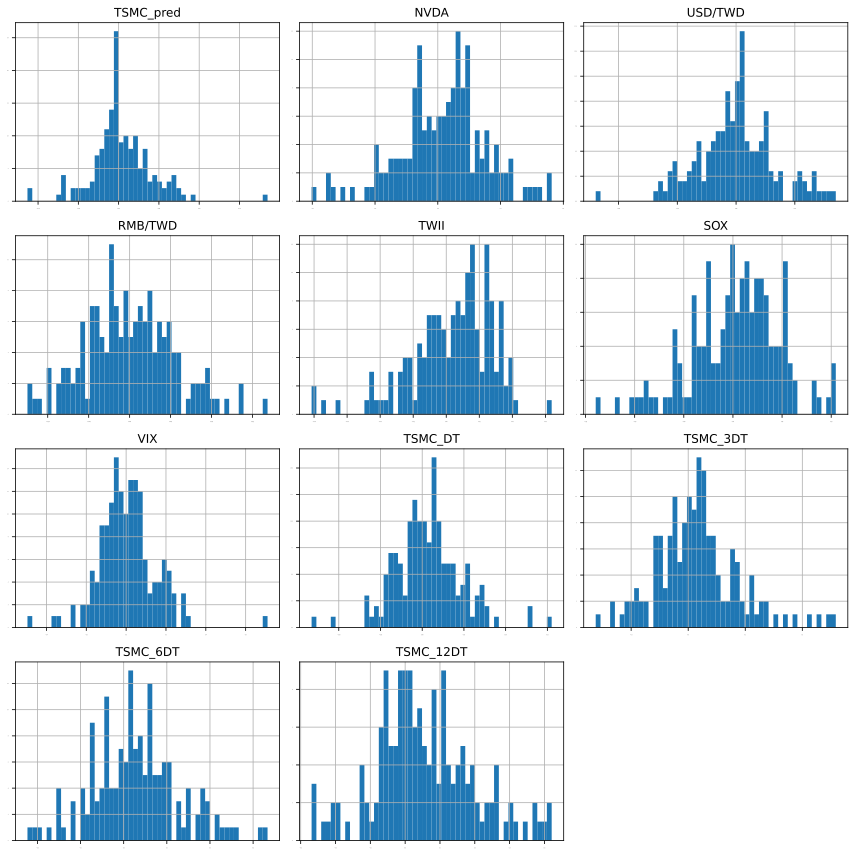

In [11]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12, 12))
plt.tight_layout()  # 避免圖表元素重疊、提高圖表空間利用率
plt.show()

The above histogram shows the distribution for each series individually.  
Next, let's look at the density distribution over the same x axis scale.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

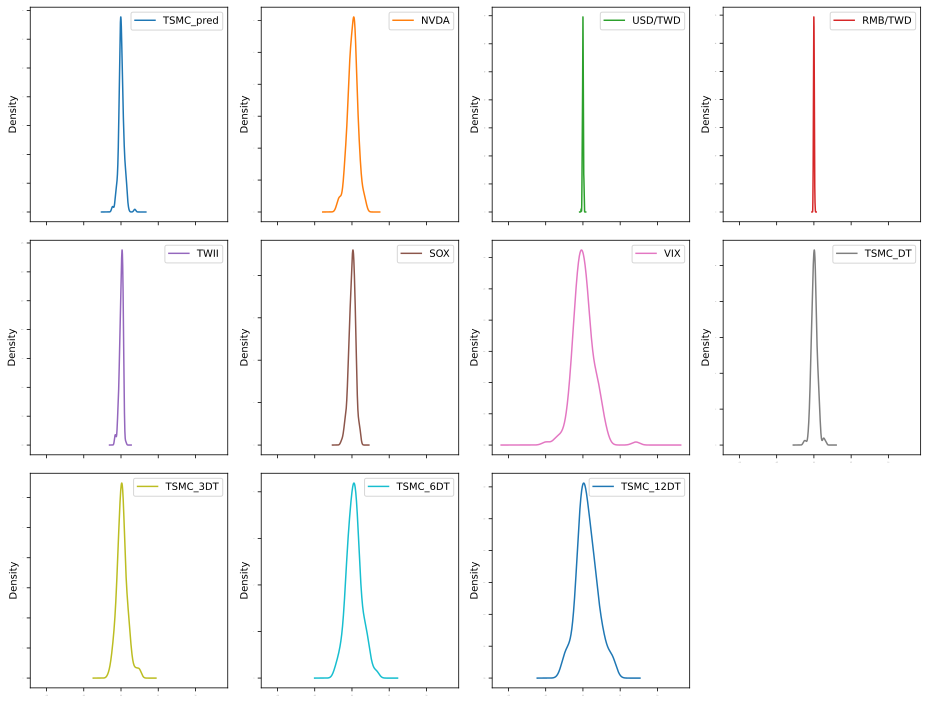

In [12]:
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(13, 13))
plt.tight_layout()
plt.show()

We can see that the VIX has a much larger variance compared to the other distributions.

In order to get a sense of the interdependence of the data we look at the scatter plot and the correlation matrix below.

<Figure size 1300x1300 with 0 Axes>

Text(0.5, 1.0, 'Correlation Matrix')

<Axes: title={'center': 'Correlation Matrix'}>

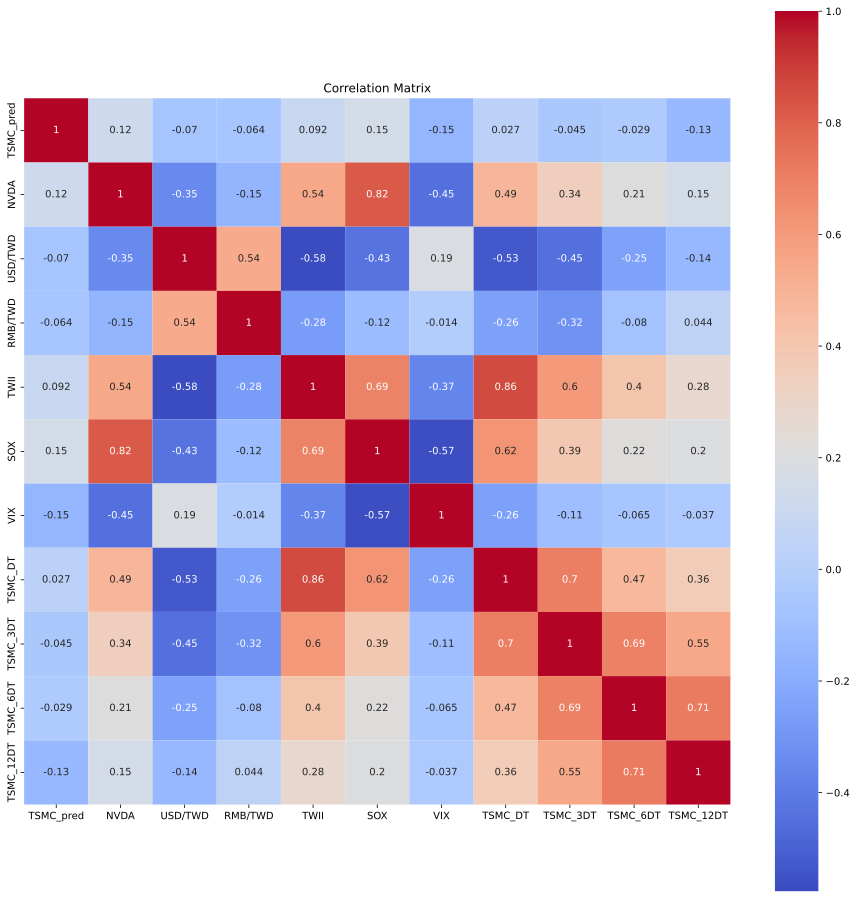

In [13]:
correlation = dataset.corr()
plt.figure(figsize=(13, 13))
plt.title('Correlation Matrix')
plt.tight_layout()
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='coolwarm')

Looking at the correlation plot above, we see some correlation of the predicted variable with the lagged 5 days, 15 days, 30 days and 60 days return of TSMC.

In [14]:
# 設定子圖 y 軸小數顯示位數
axes = scatter_matrix(dataset, figsize=(15, 15))

# 遞迴處理所有子圖的座標軸
for ax in axes.flatten():
    # 設定 x 軸和 y 軸的格式
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

plt.tight_layout()
plt.show()

Looking at the scatter plot above, we see some linear relationship of the predicted
variable with the lagged 15 days, 30 days and 60 days return of TSMC.

<a id='2.3'></a>
## 3.3. Time Series Analysis

Next, we look at the seasonal decomposition of our time series

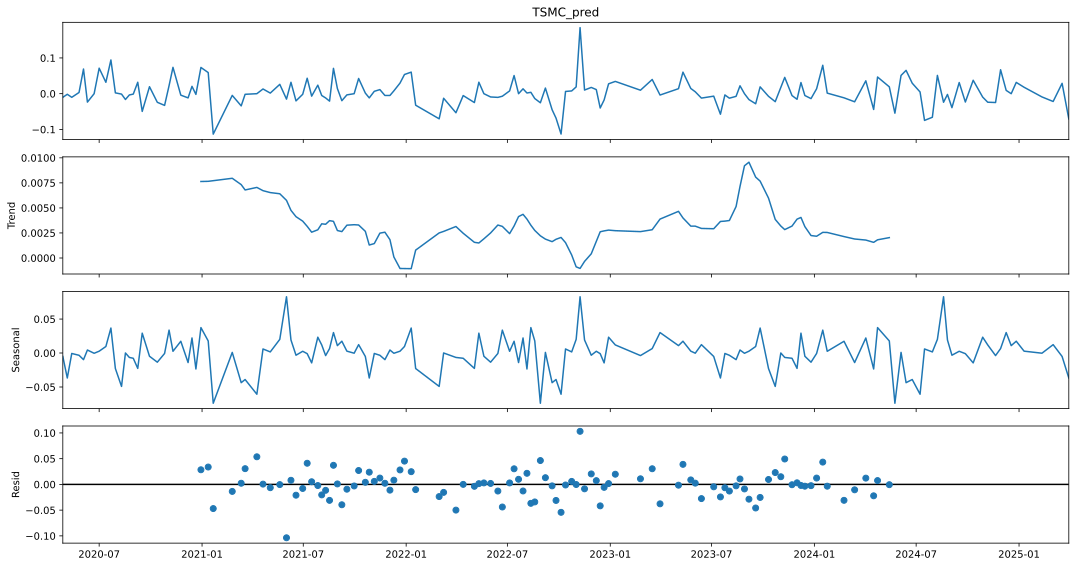

In [15]:
res = sm.tsa.seasonal_decompose(Y, period=52)
fig = res.plot()
fig.set_size_inches(15, 8)
plt.tight_layout()
plt.show()

We can see that for TSMC there has been a general trend upwards. This should show up in our the constant/bias terms in our models

<a id='3'></a>
## 4. Data Preparation

<a id='3.2'></a>
## 4.2. Feature Selection

We use sklearn's SelectKBest function to get a sense of feature importance.

In [16]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  # print 10 best features

,Score
Specs,
SOX,3.735
VIX,3.568
TSMC_12DT,2.808
NVDA,2.243
TWII,1.324
USD/TWD,0.770
RMB/TWD,0.646
TSMC_3DT,0.317
TSMC_6DT,0.130


We see that NVDA seems to be the most important feature and TSMC_3DT being the least important.

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split and Evaluation Metrics

Next, we start by splitting our data in training and testing chunks. If we are going to use Time series models we have to split the data in continous series.

In [17]:
validation_size = 0.2

# In case the data is not dependent on the time series, then train and test split randomly
# seed = 11218014
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# In case the data is dependent on the time series, then train and test split should be done based on sequential sample
# This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.

train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics

<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

<a id='4.3.1'></a>
### 5.3.1 Machine Learning models-from scikit-learn

##### Regression and Tree Regression algorithms

In [18]:
models = []

##### Neural Network algorithms

In [19]:
models.append(('MLP', MLPRegressor()))

In [20]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error.
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error'

In [ ]:
'''
hidden_layer_sizes: tuple, length = n_layers - 2, default (100, )
    The ith element represents the number of neurons in the ith
    hidden layer.
'''

import itertools

# 設定總神經元數量和最大層數
total_neurons = 100
max_layers = 10

# 建立所有可能的層數
layer_numbers = range(1, max_layers + 1)

# 建立所有可能的配置組合，包含所有排列順序
param_grid = {
    'hidden_layer_sizes': [
        neurons
        for num_layers in layer_numbers
        for neurons in itertools.chain.from_iterable( # 使用 itertools.chain.from_iterable 將所有排列組合扁平化
            [itertools.permutations(combination) for combination in itertools.combinations_with_replacement(range(1, total_neurons + 1), num_layers)] # 使用 itertools.permutations 生成所有排列組合
        )
        if sum(neurons) == total_neurons # 確保總神經元數量為 100
    ]
}

model = MLPRegressor()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

'\nhidden_layer_sizes: tuple, length = n_layers - 2, default (100, )\n    The ith element represents the number of neurons in the ith\n    hidden layer.\n'

In [104]:
# prepare model
model_tuned_MLP = MLPRegressor(hidden_layer_sizes=(30, 25, 15))
model_tuned_MLP.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(30, 25, 15))

In [105]:
# estimate accuracy on validation set
# transform the validation dataset
predictions = model_tuned_MLP.predict(X_test)
print(mean_squared_error(Y_test, predictions))

0.002693970744619568


Once we have selected all the models, we loop over each of them.  
First, we run the K-fold analysis.  
Next, we run the model on the entire training and testing dataset.

In [106]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)

    msg = "%s: %f %f" % (name, train_result, test_result)
    print(msg)

MLP: 0.001326 0.001520


#### Training and Test error

Looking at the training and test error, we still see a better performance of the linear models.  

Some of the algorithms, such as the decision tree regressor (CART) overfit on the training data and produced very high error on the test set and these models should be avoided.  

Ensemble models, such as gradient boosting regression (GBR) and
random forest regression (RFR) have low bias but high variance.  

We also see that the artificial neural network (shown as MLP is the chart) algorithm shows higher errors both in training set and test set, which is perhaps due to the linear relationship of the variables not captured accurately by ANN or improper hyperparameters or insufficient training of the model.

<a id='4.3.1'></a>
### 5.3.1 Time Series based models-ARIMA and LSTM

Let us first prepare the dataset for ARIMA models,
by having only the correlated varriables as exogenous variables.

### Time Series Model - ARIMA Model

In [108]:
print(X_train)
X_train_ARIMA = X_train.loc[:, ['NVDA', 'USD/TWD', 'RMB/TWD', 'TWII', 'SOX', 'VIX']]
X_test_ARIMA = X_test.loc[:, ['NVDA', 'USD/TWD', 'RMB/TWD', 'TWII', 'SOX', 'VIX']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len(X)
print(X_train_ARIMA)

             NVDA    USD/TWD  RMB/TWD   TWII    SOX    VIX  TSMC_DT  TSMC_3DT  \
2020-04-27  0.034 -6.660e-04   -0.002 -0.002  0.034 -0.275   -0.020     0.079   
2020-05-05  0.008 -5.014e-03   -0.003  0.015 -0.014  0.001   -0.003     0.036   
2020-05-13  0.044  3.344e-04    0.002  0.015 -0.010  0.033    0.003     0.010   
2020-05-26 -0.010  1.002e-03   -0.004  0.013  0.025 -0.086    0.014     0.000   
2020-06-03  0.028 -5.340e-03    0.003  0.027  0.048 -0.074    0.015     0.013   
...           ...        ...      ...    ...    ...    ...      ...       ...   
2023-12-15  0.029 -8.929e-03   -0.002  0.017  0.087 -0.006    0.031     0.022   
2023-12-26 -0.007 -1.028e-02   -0.012  0.010  0.020  0.036    0.002     0.033   
2024-01-05 -0.009  1.104e-02    0.005 -0.022 -0.068  0.068   -0.029    -0.010   
2024-01-16  0.059  1.249e-02    0.010 -0.011  0.010  0.081   -0.010    -0.002   
2024-01-24  0.090 -8.262e-03   -0.003  0.041  0.097 -0.118    0.076     0.081   

            TSMC_6DT  TSMC_

In [109]:
# SARIMAX
modelSARIMAX = SARIMAX(endog=Y_train, exog=X_train_ARIMA, order=(1, 0, 0), seasonal_order=(2, 1, 0, 12))
model_fit = modelSARIMAX.fit()

In [110]:
error_Training_SARIMAX = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start=tr_len - 1 ,end=to_len - 1, exog=X_test_ARIMA)[1: ]
error_Test_SARIMAX = mean_squared_error(Y_test,predicted)
error_Test_SARIMAX

0.0016369052703693269

#### Append to previous results

In [111]:
test_results.append(error_Test_SARIMAX)

train_results.append(error_Training_SARIMAX)

names.append("SARIMAX")

## Overall Comparison of all the algorithms (including Time Series Algorithms)

Text(0.5, 0.98, 'Comparing the performance of various algorthims on the Train and Test Dataset')

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

[Text(0, 0, 'MLP'), Text(1, 0, 'SARIMAX')]

Text(0, 0.5, 'Mean Square Error')

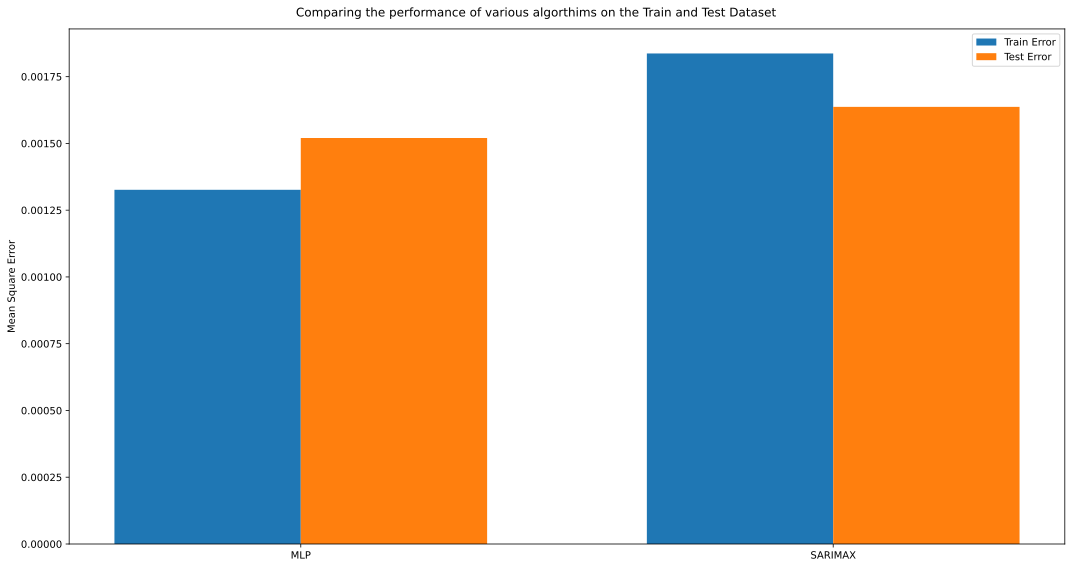

In [112]:
# compare algorithms
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15, 8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.ylabel('Mean Square Error')
plt.tight_layout()
plt.show()

Looking at the chart above, we find time series based ARIMA model comparable to
the linear supervised-regression models such as Linear Regression (LR), Lasso Regression (LASSO) and Elastic Net (EN).

This can primarily be due to the strong linear relationship as discussed before. The LSTM model performs decently, however, ARIMA model outperforms the LSTM model in the test set.

Hence, we select the ARIMA model for the model tuning.

<a id='5'></a>
# 6. Model Tuning and Grid Search

As shown in the chart above the ARIMA model is one of the best mode, so we perform the model tuning of the ARIMA model.

The default order of ARIMA model is [1,0,0]. We perform a grid search with different combination p, d and q in the ARIMA model's order.  

<a id='6'></a>
# 7. Finalise the Model

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

In [122]:
# prepare model
model_SARIMAX_tuned = SARIMAX(endog=Y_train, exog=X_train_ARIMA, order=(1, 0, 0), seasonal_order=(2, 1, 0, 12))
model_fit_SARIMAX_tuned = model_SARIMAX_tuned.fit()

In [123]:
# estimate accuracy on validation set
predicted_tuned_SARIMAX = model_fit_SARIMAX_tuned.predict(start=tr_len - 1, end=to_len - 1, exog=X_test_ARIMA)[1 : ]
print(mean_squared_error(Y_test, predicted_tuned_SARIMAX))

0.0016369052703693269


After tuning the model and picking the best ARIMA model or the order 2, 0 and 1, we select this model and can it can be used for the modeling purpose.

<a id='6.2'></a>
## 7.2. Save Model for Later Use

In [124]:
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'finalized_model.sav'
dump(model_fit_SARIMAX_tuned, open(filename, 'wb'))

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price')

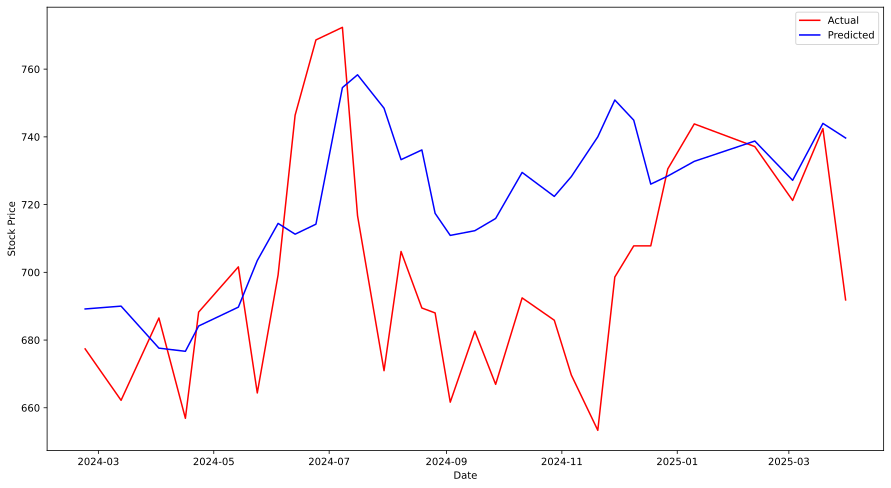

In [137]:
import matplotlib.pyplot as plt
initial_price = stk_data.loc[Y_test.index[0], ('Close', '2330.TW')]  # Get initial price from stk_data

# Calculate actual prices from returns
actual_prices = initial_price * np.exp(Y_test).cumprod()

# Calculate predicted prices from predicted returns
predicted_tuned_SARIMAX.index = Y_test.index
predicted_prices_SARIMAX = initial_price * np.exp(predicted_tuned_SARIMAX).cumprod()

# Plotting
fig = plt.figure(figsize=(15, 8)) # Create figure with figsize
ax = fig.add_subplot(111) # Add subplot to the figure
ax.plot(actual_prices, 'r', label='Actual')
ax.plot(predicted_prices_SARIMAX, 'b', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')  # Update y-axis label
ax.legend()
plt.show()

0.002368899583023077


Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price')

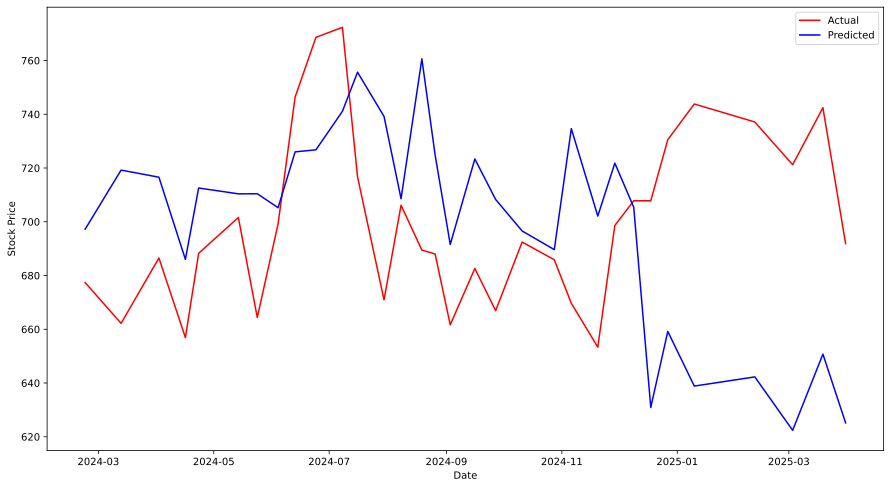

In [138]:
# prepare model
model_tuned_MLP = MLPRegressor(hidden_layer_sizes=(30, 25, 15))
model_fit_tuned_MLP = model_tuned_MLP.fit(X_train, Y_train)

# estimate accuracy on validation set
predicted_tuned_MLP = model_tuned_MLP.predict(X_test)
print(mean_squared_error(Y_test, predicted_tuned_MLP))

initial_price = stk_data.loc[Y_test.index[0], ('Close', '2330.TW')]  # Get initial price from stk_data

# Calculate actual prices from returns
actual_prices = initial_price * np.exp(Y_test).cumprod()

# Calculate predicted prices from predicted returns
predicted_tuned_MLP = pd.Series(predicted_tuned_MLP, index=Y_test.index)
predicted_prices_MLP = initial_price * np.exp(predicted_tuned_MLP).cumprod()

# Plotting
fig = plt.figure(figsize=(15, 8)) # Create figure with figsize
ax = fig.add_subplot(111) # Add subplot to the figure
ax.plot(actual_prices, 'r', label='Actual')
ax.plot(predicted_prices_MLP, 'b', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')  # Update y-axis label
ax.legend()
plt.show()

### Summary

This case study explored various machine learning and time series models to predict the weekly returns of Taiwan Semiconductor Manufacturing Company (TSMC) stock. We utilized potentially correlated assets, including NVIDIA stock, USD/TWD and RMB/TWD exchange rates, and indices like TWII, SOX, and VIX, alongside TSMC's historical data.

Our analysis revealed that linear models such as Linear Regression, Lasso Regression, and Elastic Net, along with the time series model ARIMA, demonstrated promising performance in predicting TSMC stock returns. These models effectively captured the linear relationships within the dataset and offered a flexible approach for modeling time dependencies.

While exploring various algorithms, we observed that some models, like the Decision Tree Regressor, tended to overfit the training data, resulting in higher errors on the test set. Ensemble models like Gradient Boosting Regression and Random Forest Regression showed potential but exhibited higher variance. Notably, the ARIMA model emerged as a top performer, comparable to the linear models, likely due to the strong linear relationships present in the data. Although the LSTM model was explored, ARIMA outperformed it in the test set.

Further investigation using feature selection techniques indicated the significance of NVIDIA stock returns and other factors in predicting TSMC returns. Through grid search and model tuning, we identified an optimal ARIMA model configuration.

This study demonstrates the effectiveness of combining supervised regression and time series modeling frameworks for asset price prediction. Using historical data and exploring relevant indicators allow us to generate predictive results and analyze potential risks and profitability before deploying capital.

Future improvements could involve incorporating a broader range of indicators, such as P/E ratio, trading volume, technical indicators, and news sentiment, which might further enhance predictive accuracy.

Overall, this framework provides a valuable tool for financial practitioners to model and predict asset price movements, supporting informed decision-making in financial markets.